<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
# посмотрим, что в датафрейме
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# Проверин на перекос в данных
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

В датасете поровну мужчин и женщин.

In [6]:
# Дубликаты в наличии
data.duplicated().sum()

153

In [7]:
# пропусков нет
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

### Вывод

* В датасете 5000 строк.
* Данные примерно поровну поделены на мужчин и женщин.
* В датасете информация: Пол, Возраст, Зарплата, Члены семьи, Страховые выплаты - это признаки. Целевой признак - Страховые выплаты


In [8]:
# посмотрим корреляцию между признаками
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


array([[<AxesSubplot:xlabel='Пол', ylabel='Пол'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Пол'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Пол'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Пол'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Пол'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Возраст'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Зарплата'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Члены семьи'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Член

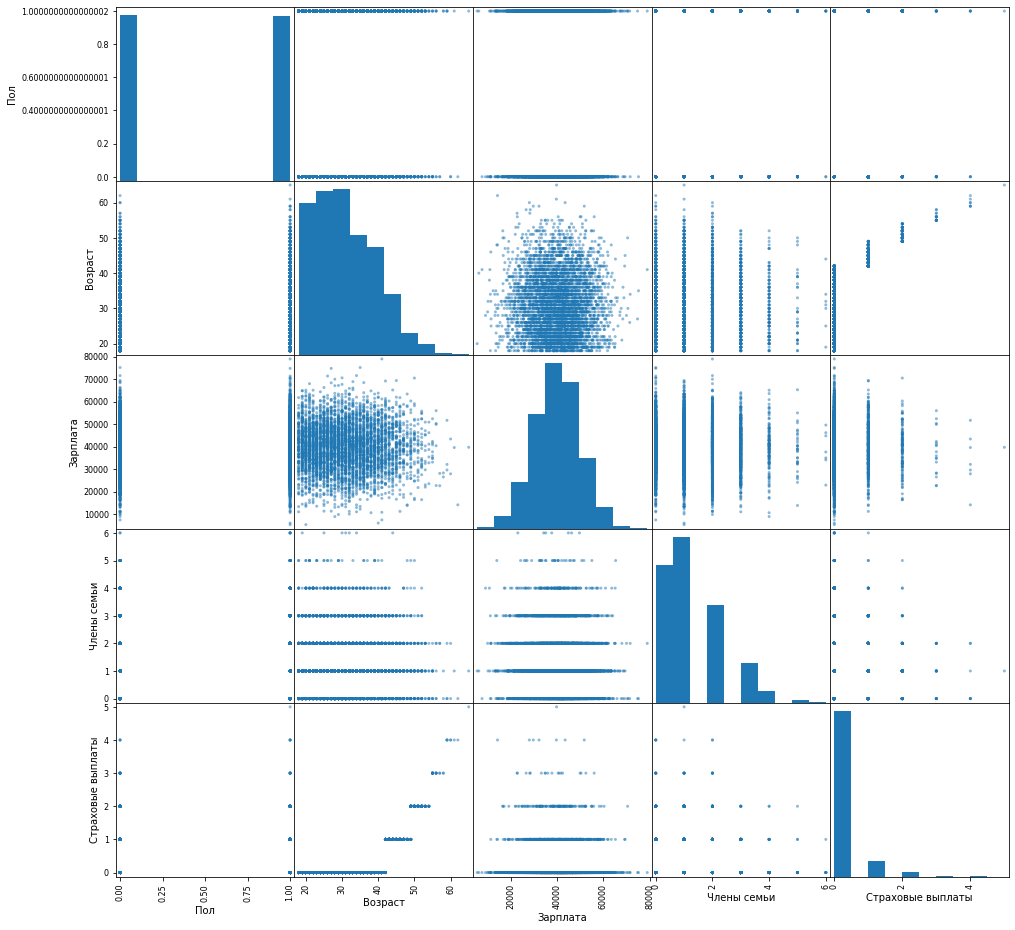

In [9]:
# Графическое представление корреляции
pd.plotting.scatter_matrix(data, figsize=(16,16))

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**

* Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    - a. Изменится. Приведите примеры матриц.
    - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


**Ответ:** b. Не изменится.

**Обоснование:** :

Признаки **X** умножают на обратимую матрицу **𝑃**:

$$
X_1 = XP
$$
Тогда наши криптопредсказания:
$$
a_1 = Xw_1
$$


Тогда можно записать наш криптовектор так:
$$
w_1 = (X_1^T X_1)^{-1} X_1^T y
$$
или

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем все скобки, какие только  можно. Есть правила для матриц: 
$$
(AB)^T = B^TA^T
$$

Тогда наш криптовектор примет вид:
$$
w_1 = (P^TX^TXP)^{-1} P^TX^T y
$$

Применим второе правило, ниже:
$$
(AB)^{-1} = B^{-1}A^{-1} 
$$

$$
w_1 = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y
$$

И третье правило, при умножении матрицы на обратную себе, получается единичная матрица:
$$
AA^{-1} = A^{-1}A = E
$$

Применим это правило к криптовектору для **P** матриц. Получим 

$$
w_1 = P^{-1}(X^TX)^{-1}EX^T y 
$$

или

$$
w_1 = P^{-1}(X^TX)^{-1}X^T y 
$$

или
$$
w_1 = P^{-1}w
$$
Криптовектор весов линейной регрессии оказался равен произведению обратной матрицы **P** на вектор предсказаний **w**


$$
a_1 = XPP^{-1}w
$$

Снова сократим то, что можно сократить, а именно P матрицы:
$$
a_1 = Xw = a
$$

Можно шифровать

### Вывод

При умножении признаков на обратимую матрицу  **P** -  качество нашей линейной регрессии не пострадает. Можно шифровать


## Алгоритм преобразования

**Алгоритм**

Алгоритм будет как предыдущем пункте:

* Возьмем **P** матрицу, которая должна быть квадратная и обратимая. В обратимости надо убедиться. Размерность матрицы P будет по числу признаковнашей матрицы X, то есть 4х4, Целевой признак исключен из размерности.
* Преобразуем признаки: перемножим матрицу с признаками **X** на матрицу **P**
* Найдем метрику R2 

**Обоснование**
Теоретическое обоснование такого метода было сделано выше. Сейчас реализуем его в коде
...

In [10]:
# подготовим нешифрованные признаки

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']


In [11]:
# подготовим квадратную матрицу P поразмерам матрицы features
# 
np.random.seed(0)
P = np.random.normal(size=(features.shape[1], features.shape[1]))

In [12]:
P

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433]])

In [13]:
# Проверим на обратимость
try:
    np.linalg.inv(P)
    print('Матрица P обратима: \n', np.linalg.inv(P))
except:
    print('Мартица Р необратима, надо выбрать другую')

Матрица P обратима: 
 [[ 2.11085143 -0.59820592 -2.74511783 -2.48320948]
 [ 0.02821503 -1.00893094 -0.68038028  2.31819805]
 [-4.03395824  1.21012513  4.73060099  7.02254523]
 [ 0.54141147  0.12254136  0.2163297  -1.52633955]]


In [14]:
np.linalg.det(P)

0.2827659277931275

In [15]:
if np.linalg.det(P) != 0:
    print('Матрица P обратима: \nДетерминант:', np.linalg.det(P))
else:
    print('Мартица Р необратима, надо выбрать другую')    


Матрица P обратима: 
Детерминант: 0.2827659277931275


In [16]:
#Зашифроуем признаки с помощью матрицы P, перемножив ее с матрицей features
X_crypto = features @ P
X_crypto

,0,1,2,3
0,-5040.560081,20326.139135,7184.937356,72128.334867
1,-3835.647663,15557.909966,5517.803635,55255.764507
2,-2113.436706,8594.227482,3052.467558,30535.354287
3,-4263.485327,17101.678045,6027.456501,60640.694088
4,-2639.956356,10689.657277,3787.118421,37954.541423
...,...,...,...,...
4995,-3631.099310,14631.246089,5169.845693,51913.993545
4996,-5344.409825,21482.255729,7580.629998,76199.119294
4997,-3460.245841,13899.987008,4902.966557,49297.512091
4998,-3330.123012,13405.836082,4733.437050,47554.655735


In [17]:
#Обучим линейную регрессию на зашифрованной матрице

model_crypto = LinearRegression()
model_crypto.fit(X_crypto, target)
prediction_crypto = model_crypto.predict(X_crypto)


In [18]:
#Посмотрим метрику R2
R2_crypto = r2_score(target, prediction_crypto)
R2_crypto

0.424945502866682

## Проверка алгоритма

In [19]:
# Для проверки обучим линейную регрессию на незашиврованной матрице и посмотрим метрику R2
model = LinearRegression()
model.fit(features, target)
prediction = model.predict(features)

In [20]:
#Посмотрим метрику R2
R2 = r2_score(target, prediction)
R2

0.4249455028666801

In [21]:
# разница между метриками крайне незначительная
R2_crypto - R2

1.887379141862766e-15

In [22]:
# Попробуем восстановить исходную матрицу из зашифрованной
X_uncrip = np.round(X_crypto @ np.linalg.inv(P))


In [23]:
# посмотрим, что получилось
features.info()
print()
X_uncrip.info()
print(features, '   ', X_uncrip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Пол          5000 non-null   int64  
 1   Возраст      5000 non-null   float64
 2   Зарплата     5000 non-null   float64
 3   Члены семьи  5000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 156.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB
      Пол  Возраст  Зарплата  Члены семьи
0       1     41.0   49600.0            1
1       0     46.0   38000.0            1
2       0     29.0   21000.0            0
3       0     21.0   41700.0            2
4       1

In [24]:
# Если вычесть расшифрованную матрицу X_uncrip из непреобразованной матрицы признаков features, то получаем матрицу с нулями, значит матрицы
(np.round(features.values) - np.round(X_uncrip)).describe()

,0,1,2,3
count,5000.0,5000.0,5000.0,5000.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


## Вывод

* Были загружены данные. 
* Теоретически проверили, что качество линейной регрессии не меняется при использовании обратимой квадратной матрицы для шифрования признаков
* Сформулировали алгоритм преобразования признаков. Зашифровали признаки. Обучили модель линейной регрессии на преобразованных признаках. Получили метрику качества R2_crypto
* Реализовали алгоритм в коде. Для проверки качества на исходных признакакх обучили модель и получили метрику R2.
* Метрики качества  R2_crypto и R2 получились одинаковые, то есть качество линейной регрессии не изменяется при использовании обратимой матрицы для шифрования данных .


